# Arbitrary line-arc bézier joint

The idea is to join an arc of a circle to a line with the following conditions:

* at start (the arc), the point, the tangeant and the curvature are known
* at the end (the line), the point and the tangeant are known

The continuity is ensured up to the derivative of the curvature, which is null at both ends.

## 8th order bézier curve definition

In [1]:
x[t_] := p0x*(1-t)^7 + p1x*7*t^1*(1-t)^6 + p2x*21*t^2*(1-t)^5 + p3x*35*t^3*(1-t)^4 + p4x*35*t^4*(1-t)^3 + p5x*21*t^5*(1-t)^2 + p6x*7*t^6*(1-t)^1 + p7x*t^7

In [2]:
y[t_] := p0y*(1-t)^7 + p1y*7*t^1*(1-t)^6 + p2y*21*t^2*(1-t)^5 + p3y*35*t^3*(1-t)^4 + p4y*35*t^4*(1-t)^3 + p5y*21*t^5*(1-t)^2 + p6y*7*t^6*(1-t)^1 + p7y*t^7

In [3]:
s[t_] := (x'[t]*y''[t] - y'[t]*x''[t]) / (( x'[t]^2 + y'[t]^2 )^(3/2))

5                 5                 5                  4
((42 p0y (1 - t)  - 84 p1y (1 - t)  + 42 p2y (1 - t)  + 210 p1y (1 - t)  t - 
 
                        4                    4                    3  2
>        420 p2y (1 - t)  t + 210 p3y (1 - t)  t + 420 p2y (1 - t)  t  - 
 
                        3  2                  3  2                  2  3
>        840 p3y (1 - t)  t  + 420 p4y (1 - t)  t  + 420 p3y (1 - t)  t  - 
 
                        2  3                  2  3                    4
>        840 p4y (1 - t)  t  + 420 p5y (1 - t)  t  + 210 p4y (1 - t) t  - 
 
                          4                    4           5           5           5
>        420 p5y (1 - t) t  + 210 p6y (1 - t) t  + 42 p5y t  - 84 p6y t  + 42 p7y t ) 
 
                      6                6                 5                   5
>      (-7 p0x (1 - t)  + 7 p1x (1 - t)  - 42 p1x (1 - t)  t + 42 p2x (1 - t)  t - 
 
                        4  2                  4  2                  3  3
>        105 p2x (1 - t)  t  + 105 p3x (1 - t)  t  - 140 p3x (1 - t)  t  + 
 
                        3  3                  2  4                  2  4
>        140 p4x (1 - t)  t  - 105 p4x (1 - t)  t  + 105 p5x (1 - t)  t  - 
 
                         5                   5          6          6
>        42 p5x (1 - t) t  + 42 p6x (1 - t) t  - 7 p6x t  + 7 p7x t ) - 
 
                     5                 5                 5                  4
>     (42 p0x (1 - t)  - 84 p1x (1 - t)  + 42 p2x (1 - t)  + 210 p1x (1 - t)  t - 
 
                        4                    4                    3  2
>        420 p2x (1 - t)  t + 210 p3x (1 - t)  t + 420 p2x (1 - t)  t  - 
 
                        3  2                  3  2                  2  3
>        840 p3x (1 - t)  t  + 420 p4x (1 - t)  t  + 420 p3x (1 - t)  t  - 
 
                        2  3                  2  3                    4
>        840 p4x (1 - t)  t  + 420 p5x (1 - t)  t  + 210 p4x (1 - t) t  - 
 
                          4                    4           5           5           5
>        420 p5x (1 - t) t  + 210 p6x (1 - t) t  + 42 p5x t  - 84 p6x t  + 42 p7x t ) 
 
                      6                6                 5                   5
>      (-7 p0y (1 - t)  + 7 p1y (1 - t)  - 42 p1y (1 - t)  t + 42 p2y (1 - t)  t - 
 
                        4  2                  4  2                  3  3
>        105 p2y (1 - t)  t  + 105 p3y (1 - t)  t  - 140 p3y (1 - t)  t  + 
 
                        3  3                  2  4                  2  4
>        140 p4y (1 - t)  t  - 105 p4y (1 - t)  t  + 105 p5y (1 - t)  t  - 
 
                         5                   5          6          6
>        42 p5y (1 - t) t  + 42 p6y (1 - t) t  - 7 p6y t  + 7 p7y t )) / 
 
                              6                6                 5
>   Power[Power[-7 p0x (1 - t)  + 7 p1x (1 - t)  - 42 p1x (1 - t)  t + 
 
                      5                    4  2                  4  2
>       42 p2x (1 - t)  t - 105 p2x (1 - t)  t  + 105 p3x (1 - t)  t  - 
 
                       3  3                  3  3                  2  4
>       140 p3x (1 - t)  t  + 140 p4x (1 - t)  t  - 105 p4x (1 - t)  t  + 
 
                       2  4                   5                   5          6          6
>       105 p5x (1 - t)  t  - 42 p5x (1 - t) t  + 42 p6x (1 - t) t  - 7 p6x t  + 7 p7x t
 
                                   6                6                 5
>       , 2] + Power[-7 p0y (1 - t)  + 7 p1y (1 - t)  - 42 p1y (1 - t)  t + 
 
                      5                    4  2                  4  2
>       42 p2y (1 - t)  t - 105 p2y (1 - t)  t  + 105 p3y (1 - t)  t  - 
 
                       3  3                  3  3                  2  4
>       140 p3y (1 - t)  t  + 140 p4y (1 - t)  t  - 105 p4y (1 - t)  t  + 
 
                       2  4                   5                   5          6          6
>       105 p5y (1 - t)  t  - 42 p5y (1 - t) t  + 42 p6y (1 - t) t  - 7 p6y t  + 7 p
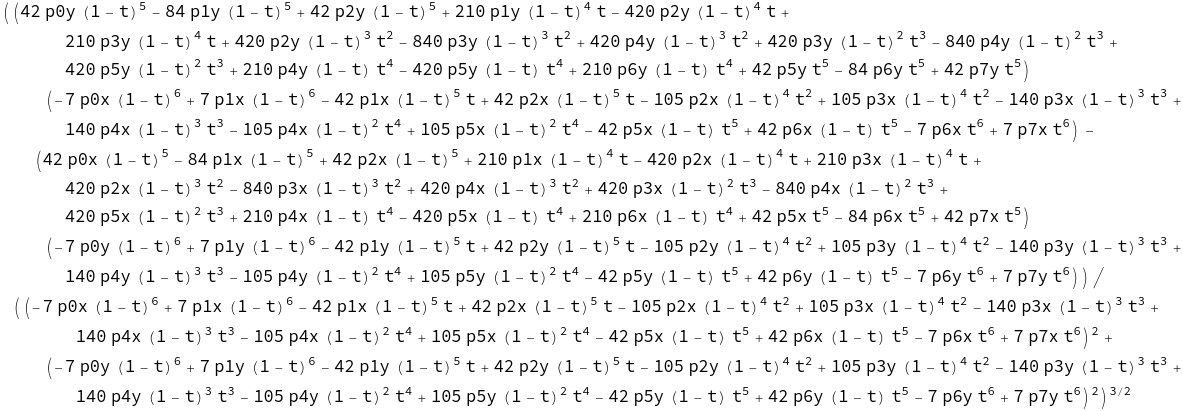

In [4]:
s[t]

## Numerical exemple

test for some given fixed values

In [5]:
plst = {
    p0x -> 0, p0y -> 0,
    p1x -> 1, p1y -> 0,
    p2x -> 2, p2y -> 0,
    p3x -> 3, p3y -> 0,
    p4x -> 2, p4y -> -2,
    p5x -> 3, p5y -> -1,
    p6x -> 4, p6y -> 0,
    p7x -> 5, p7y -> 1
}

{p0x -> 0, p0y -> 0, p1x -> 1, p1y -> 0, p2x -> 2, p2y -> 0, p3x -> 3, p3y -> 0, 
 
>   p4x -> 2, p4y -> -2, p5x -> 3, p5y -> -1, p6x -> 4, p6y -> 0, p7x -> 5, p7y -> 1}

-Graphics-
-Graphics-
-Graphics-
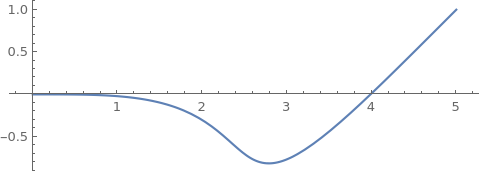
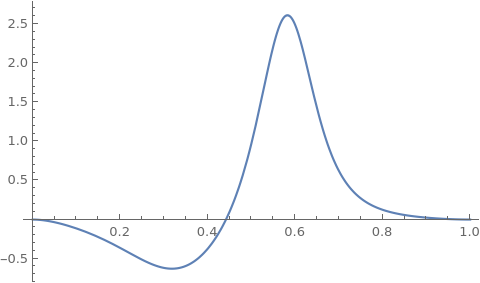
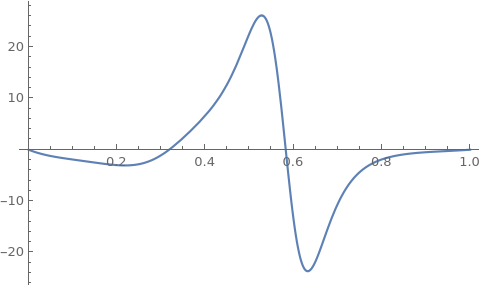

In [6]:
ParametricPlot[{ x[t] /. plst, y[t] /. plst }, {t, 0, 1}]
Plot[s[t] /. plst, {t, 0, 1}]
Plot[s'[t] /. plst, {t, 0, 1}]

## Parametrized problem

In order to simplify the computation, we try to reduce the number of parameters:

* $P_0$ is placed at the origin: $(0, 0)$
* $P_1$ is placed on the abscissa, at a distance $d$: $(d, 0)$
* $P_2$ and $P_3$ are placed after $P_1$, at the same distance $d$ but with a given angle ($\alpha_1$ and $\alpha_2$ respectively)
* $P_7$ is placed at the end of the curve, and $P_4$ is placed on the tangeant at the end.
* $P_5$ and $P_6$ are placed as interpolations of the previous two points

This parametrization is defined in `pque`

{p0x -> 0, p0y -> 0, p1x -> d, p1y -> 0, p2x -> d + d Cos[a1], p2y -> d Sin[a1], 
 
>   p3x -> d + d Cos[a1] + d Cos[a1 + a2], p3y -> d Sin[a1] + d Sin[a1 + a2], 
 
                                     2 p4xm + p7xm         2 p4ym + p7ym
>   p4x -> p4xm, p4y -> p4ym, p5x -> -------------, p5y -> -------------, 
                                           3                     3
 
           p4xm + 2 p7xm         p4ym + 2 p7ym
>   p6x -> -------------, p6y -> -------------, p7x -> p7xm, p7y -> p7ym}
                 3                     3
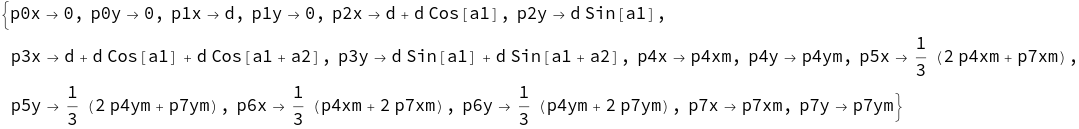

In [9]:
pque = {
    p0x -> 0, p0y -> 0,
    p1x -> d, p1y -> 0,
    p2x -> d + d*Cos[a1], p2y -> d*Sin[a1],
    p3x -> d + d*Cos[a1] + d*Cos[a1+a2], p3y -> d*Sin[a1] + d*Sin[a1+a2],
    p4x -> p4xm, p4y -> p4ym,
    p5x -> (2*p4xm + p7xm)/3, p5y -> (2*p4ym + p7ym)/3,
    p6x -> (p4xm + 2*p7xm)/3, p6y -> (p4ym + 2*p7ym)/3,
    p7x -> p7xm, p7y -> p7ym
}

In [10]:
pram = {
    d -> 1, a1 -> 0.2, a2 -> 0.4,
    p4xm -> 2, p4ym -> -2, p7xm -> 5, p7ym -> 1
}

{d -> 1, a1 -> 0.2, a2 -> 0.4, p4xm -> 2, p4ym -> -2, p7xm -> 5, p7ym -> 1}

In [11]:
plin = Line[{{p0x,p0y}, {p1x,p0y}, {p2x,p2y}, {p3x,p3y}, {p4x,p4y}, {p5x,p5y}, {p6x,p6y}, {p7x,p7y}} /. pque /. pram]

Line[{{0, 0}, {1, 0}, {1.98007, 0.198669}, {2.8054, 0.763312}, {2, -2}, {3, -1}, {4, 0}, 
 
>    {5, 1}}]

-Graphics-
-Graphics-
-Graphics-
-Graphics-
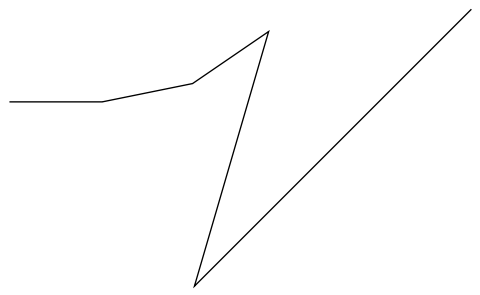
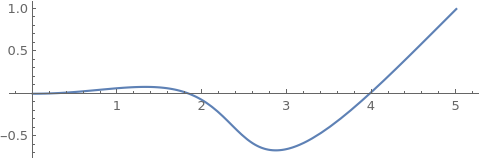
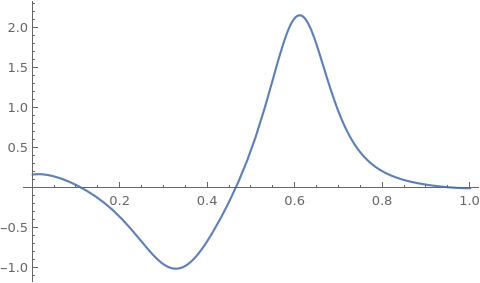
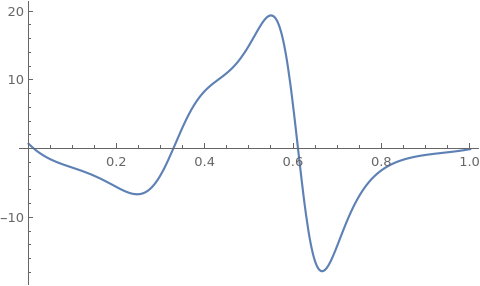

In [12]:
Graphics[plin]
ParametricPlot[{ x[t] /. pque /. pram, y[t] /. pque /. pram }, {t, 0, 1}]
Plot[s[t] /. pque /. pram, {t, 0, 1}]
Plot[s'[t] /. pque /. pram, {t, 0, 1}]

6 Sin[a1]
----------
        2
7 Sqrt[d ]
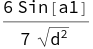

In [16]:
s[0] /. pque

7 d r0
{{a1 -> ConditionalExpression[ArcSin[------], 
                                       6
 
                 6                       -6            6         6
>      (0 < d <= - && -1 <= r0 <= 1) || (--- <= r0 <= --- && d > -)]}}
                 7                       7 d          7 d        7
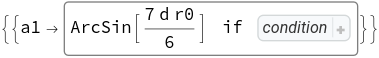

In [17]:
Solve[(s[0] /. pque) == r0 && r0 <= 1 && -1 <= r0 && 0 <= d && a1 <= Pi /2 && -Pi / 2 <= a1, a1, Reals]

7 d r0
{a1 -> ArcSin[------]}
                6
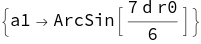

In [18]:
psol = {
    a1 -> ArcSin[7*d*r0 / 6]
}

3
-18 d  (-84 d + 42 (d + d Cos[a1])) Sin[a1]
------------------------------------------- + 
                     2 5/2
                49 (d )
 
    d (-630 d Sin[a1] + 210 (d Sin[a1] + d Sin[a1 + a2]))
>   -----------------------------------------------------
                              2 3/2
                         49 (d )
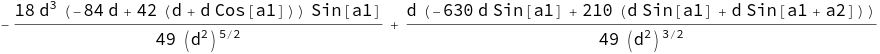

In [19]:
s'[0] /. pque

2   2                        7 d r0
7 d r0 (8 - 3 Sqrt[36 - 49 d  r0 ]) + 30 Sin[a2 + ArcSin[------]]
                                                           6
-----------------------------------------------------------------
                                   2
                           7 Sqrt[d ]
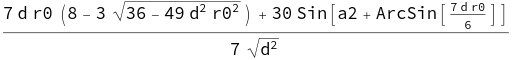

In [20]:
Simplify[Expand[s'[0] /. pque /. psol]]

7 d r0
{{a2 -> ConditionalExpression[Pi - ArcSin[------] - 
                                            6
 
                                               2   2
               7 d (-8 r0 + 3 r0 Sqrt[36 - 49 d  r0 ])
>       ArcSin[---------------------------------------] + 2 Pi C[1], 
                                 30
 
                                                         2   2          4   4
>      (C[1] ∈ Integers && Root[900 - 3360 d #1 - 12740 d  #1  + 21609 d  #1  & , 1] <= 
 
                                               2   2          4   4
>          r0 <= Root[900 + 3360 d #1 - 12740 d  #1  + 21609 d  #1  & , 2] && d < 0) || 
 
                                                          2   2          4   4
>       (C[1] ∈ Integers && Root[900 + 3360 d #1 - 12740 d  #1  + 21609 d  #1  & , 1] <= 
 
                                               2   2          4   4
>          r0 <= Root[900 - 3360 d #1 - 12740 d  #1  + 21609 d  #1  & , 2] && d > 0)]}, 
 
                                         7 d r0
>   {a2 -> ConditionalExpression[-ArcSin[------] + 
                                           6
 
                                               2   2
               7 d (-8 r0 + 3 r0 Sqrt[36 - 49 d  r0 ])
>       ArcSin[---------------------------------------] + 2 Pi C[1], 
                                 30
 
                                                         2   2          4   4
>      (C[1] ∈ Integers && Root[900 - 3360 d #1 - 12740 d  #1  + 21609 d  #1  & , 1] <= 
 
                                               2   2          4   4
>          r0 <= Root[900 + 3360 d #1 - 12740 d  #1  + 21609 d  #1  & , 2] && d < 0) || 
 
                                                          2   2          4   4
>       (C[1] ∈ Integers && Root[900 + 3360 d #1 - 12740 d  #1  + 21609 d  #1  & , 1] <= 
 
                                               2   2          4   4
>          r0 <= Root[900 - 3360 d #1 - 12740 d  #1  + 21609 d  #1  & , 2] && d > 0)]}}
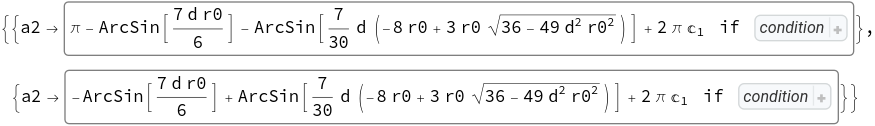

In [21]:
Solve[(s'[0] /. pque /. psol) == 0, a2, Reals]

In [22]:
s[1] /. pque /. pram

0

In [23]:
s'[1] /. pque /. pram

0

## Full exemple



7 d r0
{a1 -> ArcSin[------], a2 -> 
                6
 
                                                              2   2
             7 d r0           7 d (-8 r0 + 3 r0 Sqrt[36 - 49 d  r0 ])
>    -ArcSin[------] + ArcSin[---------------------------------------]}
               6                                30
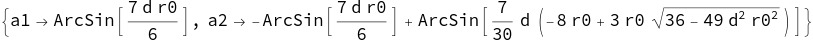

In [51]:
psol = {
    a1 -> ArcSin[7*d*r0 / 6],
    a2 -> -ArcSin[(7*d*r0)/6] + ArcSin[(7*d*(-8*r0 + 3*r0*Sqrt[36 - 49*d^2*r0^2]))/30]
}

In [72]:
ptst = {
    r0 -> 0.5, d -> 1.0,
    p4xm -> 2, p4ym -> -2,
    p7xm -> 5, p7ym -> 1
}

{r0 -> 0.5, d -> 1., p4xm -> 2, p4ym -> -2, p7xm -> 5, p7ym -> 1}

In [73]:
s[0] /. pque /. psol /. ptst

0.5

-Graphics-
-Graphics-
-Graphics-
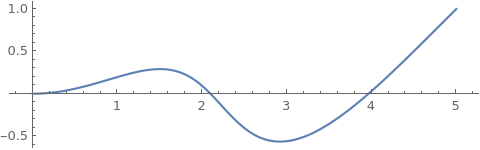
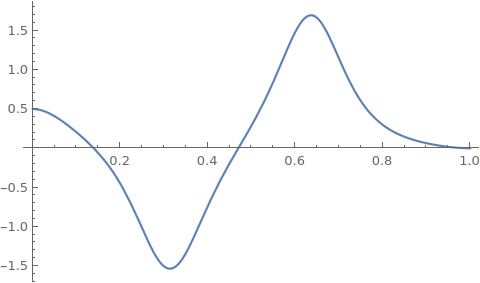
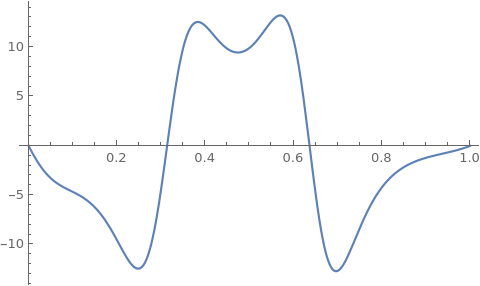

In [74]:
ParametricPlot[{ x[t] /. pque /. psol /. ptst, y[t] /. pque /. psol /. ptst }, {t, 0, 1}]
Plot[s[t] /. pque /. psol /. ptst, {t, 0, 1}]
Plot[s'[t] /. pque /. psol /. ptst, {t, 0, 1}]

## Conclusion

3 degree of freedom are still available : $d$ and the position of $P_7$ and $P_4$ on the line. They may have an influence on the maximal change in curvature.